In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

## Individual Project: Financial Database
This assignment provides us a database and asks us to explore the database and relates within it.  We are asked to explore the tables within the database, determine the information that is available, how it might relate to other information, and some hypothesis testing that may occur late

In [2]:
#These lines of codes import the database and creates a cursor
conn = sqlite3.connect('financial.db')
c = conn.cursor()

In [3]:
table_names = c.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
print(table_names)

[('account',), ('card',), ('client',), ('disp',), ('district',), ('loan',), ('order',), ('trans',)]


We can see that there are eight tables within the database inthe names given above.  We will explore each table individually and how it is realated to the other tables in this database.

### Account Table

In [4]:
c.execute("PRAGMA table_info(account);").fetchall() #shows the table info

[(0, 'account_id', 'integer', 1, '0', 1),
 (1, 'district_id', 'integer', 1, '0', 0),
 (2, 'frequency', 'varchar(18)', 1, None, 0),
 (3, 'date', 'date', 1, None, 0)]

In [5]:
c.execute("SELECT * FROM account LIMIT 5;").fetchall() #shows the first 5 values of the table

[(1, 18, 'POPLATEK MESICNE', '1995-03-24'),
 (2, 1, 'POPLATEK MESICNE', '1993-02-26'),
 (3, 5, 'POPLATEK MESICNE', '1997-07-07'),
 (4, 12, 'POPLATEK MESICNE', '1996-02-21'),
 (5, 15, 'POPLATEK MESICNE', '1997-05-30')]

In [6]:
c.execute("SELECT COUNT(*) FROM account;").fetchall()

[(4500,)]

In [7]:
c.execute("SELECT COUNT(*) FROM account WHERE frequency = 'POPLATEK MESICNE';").fetchall()

[(4167,)]

In [8]:
c.execute("SELECT * FROM account WHERE frequency <> 'POPLATEK MESICNE' LIMIT 10;").fetchall() #<> is a not equal to function

[(18, 43, 'POPLATEK TYDNE', '1993-05-26'),
 (34, 67, 'POPLATEK TYDNE', '1993-09-17'),
 (38, 19, 'POPLATEK TYDNE', '1997-08-08'),
 (66, 48, 'POPLATEK PO OBRATU', '1993-12-03'),
 (68, 37, 'POPLATEK PO OBRATU', '1994-12-20'),
 (72, 1, 'POPLATEK TYDNE', '1996-06-20'),
 (84, 44, 'POPLATEK PO OBRATU', '1995-12-25'),
 (120, 65, 'POPLATEK TYDNE', '1995-06-16'),
 (125, 2, 'POPLATEK PO OBRATU', '1996-09-07'),
 (132, 40, 'POPLATEK PO OBRATU', '1996-05-11')]

In [9]:
frequencies = c.execute("SELECT frequency FROM account").fetchall()

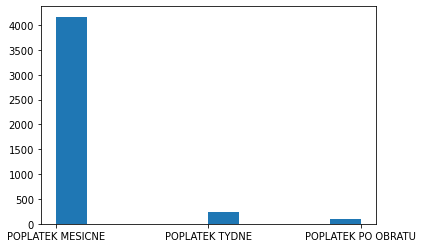

In [10]:
plt.hist([i[0] for i in frequencies])  #this is because the list comes in 1d tuples
plt.show()

We can see that the account table is ordered in numerical order with 3 other columns.  There are 4500 accounts in the database, We are also given a district id, an a frequency which correlates to statement issuance, and the state date.  In the above histogram (that shows bar heights proportional to the number of values with a certain frequency) we can see that the vast majority of "POPLATEK MESCINE" which noting the documenation means statements are issued monthly.  There are much fewer issued weekly or after a transaction).  The next table we will analyze is the district table as it can be related to the account table via the second column.

### District Table

In [11]:
c.execute("PRAGMA table_info(district);").fetchall()

[(0, 'district_id', 'integer', 1, '0', 1),
 (1, 'A2', 'varchar(19)', 1, None, 0),
 (2, 'A3', 'varchar(15)', 1, None, 0),
 (3, 'A4', 'integer', 1, None, 0),
 (4, 'A5', 'integer', 1, None, 0),
 (5, 'A6', 'integer', 1, None, 0),
 (6, 'A7', 'integer', 1, None, 0),
 (7, 'A8', 'integer', 1, None, 0),
 (8, 'A9', 'integer', 1, None, 0),
 (9, 'A10', 'decimal(4,1)', 1, None, 0),
 (10, 'A11', 'integer', 1, None, 0),
 (11, 'A12', 'decimal(4,1)', 0, 'NULL', 0),
 (12, 'A13', 'decimal(3,2)', 1, None, 0),
 (13, 'A14', 'integer', 1, None, 0),
 (14, 'A15', 'integer', 0, 'NULL', 0),
 (15, 'A16', 'integer', 1, None, 0)]

In [12]:
c.execute("SELECT * FROM district LIMIT 5;").fetchall()

[(1,
  'Hl.m. Praha',
  'Prague',
  1204953,
  0,
  0,
  0,
  1,
  1,
  100,
  12541,
  0.2,
  0.43,
  167,
  85677,
  99107),
 (2,
  'Benesov',
  'central Bohemia',
  88884,
  80,
  26,
  6,
  2,
  5,
  46.7,
  8507,
  1.6,
  1.85,
  132,
  2159,
  2674),
 (3,
  'Beroun',
  'central Bohemia',
  75232,
  55,
  26,
  4,
  1,
  5,
  41.7,
  8980,
  1.9,
  2.21,
  111,
  2824,
  2813),
 (4,
  'Kladno',
  'central Bohemia',
  149893,
  63,
  29,
  6,
  2,
  6,
  67.4,
  9753,
  4.6,
  5.05,
  109,
  5244,
  5892),
 (5,
  'Kolin',
  'central Bohemia',
  95616,
  65,
  30,
  4,
  1,
  6,
  51.4,
  9307,
  3.8,
  4.43,
  118,
  2616,
  3040)]

In [13]:
c.execute("SELECT COUNT(*) FROM district;").fetchall()

[(77,)]

In [14]:
c.execute('SELECT A2, A3 FROM district LIMIT 15;').fetchall()

[('Hl.m. Praha', 'Prague'),
 ('Benesov', 'central Bohemia'),
 ('Beroun', 'central Bohemia'),
 ('Kladno', 'central Bohemia'),
 ('Kolin', 'central Bohemia'),
 ('Kutna Hora', 'central Bohemia'),
 ('Melnik', 'central Bohemia'),
 ('Mlada Boleslav', 'central Bohemia'),
 ('Nymburk', 'central Bohemia'),
 ('Praha - vychod', 'central Bohemia'),
 ('Praha - zapad', 'central Bohemia'),
 ('Pribram', 'central Bohemia'),
 ('Rakovnik', 'central Bohemia'),
 ('Ceske Budejovice', 'south Bohemia'),
 ('Cesky Krumlov', 'south Bohemia')]

In [15]:
c.execute("SELECT A3, COUNT(*) FROM district GROUP BY A3 ORDER BY COUNT(*) DESC;").fetchall()

[('south Moravia', 14),
 ('central Bohemia', 12),
 ('north Moravia', 11),
 ('east Bohemia', 11),
 ('west Bohemia', 10),
 ('north Bohemia', 10),
 ('south Bohemia', 8),
 ('Prague', 1)]

We see that there are 77 districts (combined with the district id in account. It appears that the first value after the ID is a city/part of the city name while the latter is a general region where the place is located.  We will also note that the most districts are in the South Bohemia region with Prague being its own region. Below we will find the number of accounts in each region (rather than district) by relating the two tables. There is nothin obvious that will relate this to any table in the database other than the account table (as we already had district id).  

In [16]:
c.execute("SELECT A3, COUNT(*) FROM account JOIN district ON account.district_id = district.district_id GROUP BY A3 ORDER BY COUNT(*) DESC;").fetchall()

[('north Moravia', 793),
 ('south Moravia', 778),
 ('central Bohemia', 574),
 ('Prague', 554),
 ('east Bohemia', 544),
 ('north Bohemia', 457),
 ('west Bohemia', 430),
 ('south Bohemia', 370)]

We see that the most accounts come from north Moravia with the fewest coming from south Bohemia.  This could help with targeting when related to overall population.  There is further demographic information for each region in this chart that could be further reserached. There is nothin obvious that will relate this to any table in the database other than the account table (as we already had district id).  We will next explore the 'card' table

### Card Table

In [17]:
c.execute("PRAGMA table_info(card);").fetchall()

[(0, 'card_id', 'integer', 1, '0', 1),
 (1, 'disp_id', 'integer', 1, None, 0),
 (2, 'type', 'varchar(7)', 1, None, 0),
 (3, 'issued', 'date', 1, None, 0)]

In [18]:
c.execute("SELECT * FROM card LIMIT 5;").fetchall()

[(1, 9, 'gold', '1998-10-16'),
 (2, 19, 'classic', '1998-03-13'),
 (3, 41, 'gold', '1995-09-03'),
 (4, 42, 'classic', '1998-11-26'),
 (5, 51, 'junior', '1995-04-24')]

In [19]:
c.execute("SELECT DISTINCT type FROM card;").fetchall()

[('gold',), ('classic',), ('junior',)]

In [20]:
c.execute("SELECT COUNT(*) FROM card;").fetchall()

[(892,)]

There are 892 cards in the table which have 3 distinct types, 'gold', 'classic', and 'junior'.  We also see that this can be directly related to the 'disp' table via the dips id.  We are also given dates which we can assume are card opening dates, we will next explore the 'disp' table to see the relationship.

### Disp Table

In [21]:
c.execute("PRAGMA table_info(disp);").fetchall()

[(0, 'disp_id', 'integer', 1, None, 1),
 (1, 'client_id', 'integer', 1, None, 0),
 (2, 'account_id', 'integer', 1, None, 0),
 (3, 'type', 'varchar(9)', 1, None, 0)]

In [22]:
c.execute("SELECT * FROM disp LIMIT 5;").fetchall()

[(1, 1, 1, 'OWNER'),
 (2, 2, 2, 'OWNER'),
 (3, 3, 2, 'DISPONENT'),
 (4, 4, 3, 'OWNER'),
 (5, 5, 3, 'DISPONENT')]

In [23]:
c.execute("SELECT COUNT(*) FROM disp;").fetchall()

[(5369,)]

In [24]:
c.execute("SELECT COUNT(*) FROM disp WHERE disp_id = client_id;").fetchall()

[(4987,)]

In [25]:
c.execute("SELECT * FROM disp WHERE disp_id <> client_id LIMIT 10;").fetchall()

[(8865, 9173, 7401, 'OWNER'),
 (8866, 9174, 7401, 'DISPONENT'),
 (8888, 9196, 7418, 'OWNER'),
 (8894, 9202, 7424, 'OWNER'),
 (8909, 9217, 7437, 'OWNER'),
 (8918, 9226, 7445, 'OWNER'),
 (8923, 9231, 7449, 'OWNER'),
 (8928, 9236, 7454, 'OWNER'),
 (8942, 9250, 7465, 'OWNER'),
 (8965, 9273, 7485, 'OWNER')]

In [26]:
c.execute('SELECT DISTINCT type FROM disp').fetchall()

[('OWNER',), ('DISPONENT',)]

In [27]:
c.execute("SELECT COUNT(DISTINCT account_id) FROM disp").fetchall()

[(4500,)]

In [28]:
c.execute("SELECT COUNT(*) FROM disp WHERE type = 'OWNER'").fetchall()

[(4500,)]

There are 5369 items in the disp database which appears to be mostly a relational table.  We see that all 4500 accounts in the account table are directly related to the owner of each account.  We can also tell that all accounts are either owner and disponents.  The main purpose of this is to note the disponents under each account.  Most of the client ids and disponent ids are the same with some exceptions.  It is not immediately evident why these exceptions exist, but it may be related to people having multiple cards.  The client table will be next in our exploration

### Client Table

In [29]:
c.execute("PRAGMA table_info(client);").fetchall()

[(0, 'client_id', 'integer', 1, None, 1),
 (1, 'gender', 'varchar(1)', 1, None, 0),
 (2, 'birth_date', 'date', 1, None, 0),
 (3, 'district_id', 'integer', 1, None, 0)]

In [30]:
c.execute("SELECT * FROM client LIMIT 5;").fetchall()

[(1, 'F', '1970-12-13', 18),
 (2, 'M', '1945-02-04', 1),
 (3, 'F', '1940-10-09', 1),
 (4, 'M', '1956-12-01', 5),
 (5, 'F', '1960-07-03', 5)]

In [31]:
c.execute("SELECT COUNT(*) FROM client WHERE gender = 'F';").fetchall()

[(2645,)]

In [32]:
c.execute("SELECT COUNT(*) FROM client WHERE gender = 'M';").fetchall()

[(2724,)]

We can see that there are 5369 clients (the same as the number of rows in the disp table), as this table solely shows the gender, birthdate, id, and district of the client.  We see there are 2645 males and 2724 females.  If we wanted to figure out the distribution within a certain region (say south bohemia) we would have to join this table to the district table as below.

In [33]:
query = "SELECT COUNT (*) FROM client JOIN district ON client.district_id = district.district_id WHERE gender = 'M' AND A3 = 'south Bohemia';"

In [34]:
c.execute(query).fetchall() #number of males in south Bohemia

[(218,)]

In [35]:
query = "SELECT COUNT (*) FROM client JOIN district ON client.district_id = district.district_id WHERE gender = 'F' AND A3 = 'south Bohemia';"

In [36]:
c.execute(query).fetchall() #number of females in south Bohemia

[(231,)]

We can see that there are 449 clients in south Bohemia, 218 males and 231 females. We found this by joining the client and district tables and finding common values. As there is not a next step that is obvious in the relation (likely the rest are related to client, we will go to the next alphabetically and analyze the loan table

### Loan Table

In [37]:
c.execute("PRAGMA table_info(loan);").fetchall()

[(0, 'loan_id', 'integer', 1, '0', 1),
 (1, 'account_id', 'integer', 1, None, 0),
 (2, 'date', 'date', 1, None, 0),
 (3, 'amount', 'integer', 1, None, 0),
 (4, 'duration', 'integer', 1, None, 0),
 (5, 'payments', 'decimal(6,2)', 1, None, 0),
 (6, 'status', 'varchar(1)', 1, None, 0)]

In [38]:
c.execute("SELECT * FROM loan LIMIT 5;").fetchall()

[(4959, 2, '1994-01-05', 80952, 24, 3373, 'A'),
 (4961, 19, '1996-04-29', 30276, 12, 2523, 'B'),
 (4962, 25, '1997-12-08', 30276, 12, 2523, 'A'),
 (4967, 37, '1998-10-14', 318480, 60, 5308, 'D'),
 (4968, 38, '1998-04-19', 110736, 48, 2307, 'C')]

In [39]:
c.execute("SELECT DISTINCT status FROM loan;").fetchall()

[('A',), ('B',), ('D',), ('C',)]

In [40]:
c.execute("SELECT COUNT(*) FROM loan;").fetchall()

[(682,)]

We see that there are 682 loans in the database in one of four status markers (would need more documentation to determine this).  They are all associated with account numbers and can be related to the rest from account_id.  We also have dates of the loan, amounts of the loan, number of months the loan lasts and the number of payments made.  Continuing alphabetically, we will look at the order table

### Order Table

In [41]:
c.execute("PRAGMA table_info('order');").fetchall() #note, we need single quotes around 'order here because it is a keyword'

[(0, 'order_id', 'integer', 1, '0', 1),
 (1, 'account_id', 'integer', 1, None, 0),
 (2, 'bank_to', 'varchar(2)', 1, None, 0),
 (3, 'account_to', 'integer', 1, None, 0),
 (4, 'amount', 'decimal(6,1)', 1, None, 0),
 (5, 'k_symbol', 'varchar(8)', 1, None, 0)]

In [42]:
c.execute("SELECT * FROM 'order' LIMIT 5;").fetchall()

[(29401, 1, 'YZ', 87144583, 2452, 'SIPO'),
 (29402, 2, 'ST', 89597016, 3372.7, 'UVER'),
 (29403, 2, 'QR', 13943797, 7266, 'SIPO'),
 (29404, 3, 'WX', 83084338, 1135, 'SIPO'),
 (29405, 3, 'CD', 24485939, 327, '')]

In [43]:
c.execute("SELECT COUNT(*) FROM 'order';").fetchall()

[(6471,)]

In [44]:
c.execute("SELECT DISTINCT k_symbol FROM 'order';").fetchall()

[('SIPO',), ('UVER',), ('',), ('POJISTNE',), ('LEASING',)]

Note that the order id is the primary key of this order.  We can also associate it back to account ids to relate it to other areas of the database.  We can tell which bank they go to (likely in another database), some of the reasons why (codes in k_symbol) and the amounts of these orders from this table.  There are 6471 orders (more than the number of accounts) so we can tell the total number of orders from each transaction.  Finally, we will analyze the last table trans

### Trans Table

In [45]:
c.execute("PRAGMA table_info('trans');").fetchall()

[(0, 'trans_id', 'integer', 1, '0', 1),
 (1, 'account_id', 'integer', 1, '0', 0),
 (2, 'date', 'date', 1, None, 0),
 (3, 'type', 'varchar(6)', 1, None, 0),
 (4, 'operation', 'varchar(14)', 0, 'NULL', 0),
 (5, 'amount', 'integer', 1, None, 0),
 (6, 'balance', 'integer', 1, None, 0),
 (7, 'k_symbol', 'varchar(11)', 0, 'NULL', 0),
 (8, 'bank', 'varchar(2)', 0, 'NULL', 0),
 (9, 'account', 'integer', 0, 'NULL', 0)]

In [46]:
c.execute("SELECT * FROM trans LIMIT 5;").fetchall()

[(1, 1, '1995-03-24', 'PRIJEM', 'VKLAD', 1000, 1000, None, None, None),
 (5,
  1,
  '1995-04-13',
  'PRIJEM',
  'PREVOD Z UCTU',
  3679,
  4679,
  None,
  'AB',
  41403269),
 (6,
  1,
  '1995-05-13',
  'PRIJEM',
  'PREVOD Z UCTU',
  3679,
  20977,
  None,
  'AB',
  41403269),
 (7,
  1,
  '1995-06-13',
  'PRIJEM',
  'PREVOD Z UCTU',
  3679,
  26835,
  None,
  'AB',
  41403269),
 (8,
  1,
  '1995-07-13',
  'PRIJEM',
  'PREVOD Z UCTU',
  3679,
  30415,
  None,
  'AB',
  41403269)]

In [47]:
c.execute("SELECT COUNT(*) FROM trans;").fetchall()

[(1056320,)]

In [48]:
c.execute("SELECT DISTINCT k_symbol FROM trans;").fetchall()

[(None,),
 ('SIPO',),
 ('SLUZBY',),
 ('UVER',),
 (' ',),
 ('POJISTNE',),
 ('DUCHOD',),
 ('UROK',),
 ('SANKC. UROK',)]

In [49]:
c.execute("SELECT SUM(amount) FROM trans WHERE account_id = 1;").fetchall()

[(375192,)]

In [50]:
trans_amounts = c.execute('SELECT amount FROM trans;').fetchall()

In [51]:
vals = [i[0] for i in trans_amounts]

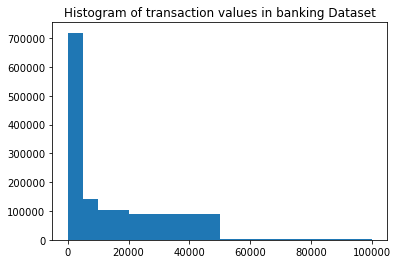

In [52]:
plt.hist(vals, bins = [0, 5000, 10000, 20000, 50000, 100000])
plt.title('Histogram of transaction values in banking Dataset')
plt.show()

Transactions are the largest table of the dataset with over 1 million seperate tasnactions.  We note that the account ids are related again to everything else.  Each transaction has an amount and a final balance after each transaction along with a lot of identifying information which would require documenation to understand.  We notice that the k_symbols include some of the same information as the order table but also includes additional values that are not the same.  We can also analyze the activity of any given account, see the example above where we can tell that account id 1 had 375,192 (of whatever currency this is in) in total transactions in the database).  Some further analysis can be used to determine how much each district or region is spending.  Finally, we plot a histogram of the amount of each transaction, which even when given uneven vins shows the vast majority of transactions are under 5000 (of whatever currency this is in) and there are a negligible amount over 50,000.  An analyst could dig deeper to determine transaction risk assessment for each value.

## Conclusion/Further Analysis

Overall, there is quite a bit of information here to analyze accounts and show analysis of orders and transactions.  We can see the regions people are from, the number of transactions they have, the amount of those transactions and some of their card and loan information (without any personally identifiable information).  Further data analysis if received could be the regions of each bank to determine the amount of national/international and within/outside district transactions occur and how active dispondents are.  As everything is organized by account id rather than dispondent/client id we only know the activity of each account.  The banker could use some more demographic data to determine where they may be underserving a community and provide some risk assessment and better products to better serve the community (and in turn profit more).  Some examples may be finding areas where loans are both highly popular and highly likely to be paid back or areas with low unemployment (and in turn a reduction in risk as they clients will have the ability to pay money back).

In [53]:
c.close()  #this just closes the cursor